In [1]:
from bs4 import BeautifulSoup as bs
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import datetime as dt

In [163]:
vendorsDF = pd.read_csv('./../data/vendorsCSVs/allVendors.csv')

In [3]:
grams_df = pd.read_csv('../saved_gen_df/agora_grams_df2.csv')

In [109]:
vendorsDF

,Unnamed: 0,Unnamed: 0.1,name,rating,lastSeen,publicKey,#products,#Deals,parsingDate,country
0,0,0,littlegoblin,4.92,4 hours,NaN,14.0,150~200,2014-09-20,EU
1,1,1,Rebel_Alliance,4.99,1 hours,NaN,7.0,300~500,2014-09-20,Canada
2,2,2,ThePartyDepot,5.00,16 hours,NaN,3.0,70~100,2014-09-20,Australia
3,3,3,cossacks,4.99,5 hours,NaN,7.0,300~500,2014-09-20,UK
4,4,4,checkpoint,4.84,1 days 0 hours,NaN,31.0,55~70,2014-09-20,Belgium
...,...,...,...,...,...,...,...,...,...,...
121153,121153,404,BabyBando,5.00,Registered 7 months 8 days 3 hours,NaN,6.0,10~15,2014-10-14,USA
121154,121154,405,daydreamer33,4.94,Registered 6 months 21 days 1 day...,NaN,6.0,200~300,2014-10-14,USA
121155,121155,406,Leckermann,5.00,Registered 6 months 22 days 5 mon...,NaN,8.0,3~5,2014-10-14,Belgium
121156,121156,407,EasyRiders,NaN,Registered 1 months 24 days 20 days,NaN,5.0,0,2014-10-14,UK


In [32]:
temp = grams_df[['vendor_name', 'ship_from']].groupby(by='vendor_name').describe().reset_index().set_index('vendor_name')


In [108]:
temp

ship_from                         
                count unique        top   freq
vendor_name                                   
 Australia       2546      1  Australia   2546
 Canada          1486      1     Canada   1486
 China          12183      1      China  12183
 France           401      1     France    401
 Sweden           234      1     Sweden    234
...               ...    ...        ...    ...
zohar             184      1        USA    184
zolter             16      2      World      9
zunidog         12462      5    Germany  11632
~BigBoy          5727      1  Australia   5727
~sweetpuff~      1552      1  Australia   1552

[2832 rows x 4 columns]

In [110]:
def fillCountry(n):
    
    try:
        rows= temp.loc[n]
        return rows.ship_from.top
    except:
        return None

In [164]:
vendorsDF['country'] = vendorsDF['name'].apply(fillCountry)

In [165]:
vendorsDF.drop(columns='publicKey', inplace=True)

In [115]:
vendorsDF

,name,rating,lastSeen,#products,#Deals,parsingDate,country
0,littlegoblin,4.92,4 hours,14.0,150~200,2014-09-20,EU
1,Rebel_Alliance,4.99,1 hours,7.0,300~500,2014-09-20,Canada
2,ThePartyDepot,5.00,16 hours,3.0,70~100,2014-09-20,Australia
3,cossacks,4.99,5 hours,7.0,300~500,2014-09-20,UK
4,checkpoint,4.84,1 days 0 hours,31.0,55~70,2014-09-20,Belgium
...,...,...,...,...,...,...,...
121153,BabyBando,5.00,3 hours,6.0,10~15,2014-10-14,USA
121154,daydreamer33,4.94,1 days 0 hours,6.0,200~300,2014-10-14,USA
121155,Leckermann,5.00,5 months 24 days,8.0,3~5,2014-10-14,Belgium
121156,EasyRiders,NaN,20 days,5.0,0,2014-10-14,UK


In [171]:
vendorsDF['lastSeen'].unique()

array(['4 hours', '1 hours', '16 hours', '5 hours', '1 days 0 hours',
       '6 hours', '1 days 12 hours', '13 hours', '0 hours', '14 hours',
       '23 hours', '8 hours', '21 hours', '3 months 13 days', '2 hours',
       '6 months 7 days', '3 hours', '1 days 4 hours', '2 days 23 hours',
       '11 hours', '12 hours', '19 hours', '1 days 6 hours', '20 hours',
       '17 hours', '6 months 14 days', '7 days', '5 days', '9 hours',
       '15 hours', '2 days 21 hours', '2 months 5 days', '1 days 2 hours',
       '1 months 7 days', '8 days', '4 months 23 days',
       '4 months 16 days', '29 days', '10 hours', '9 days',
       '2 days 7 hours', '1 days 10 hours', '18 days', '28 days',
       '5 months 19 days', '4 months 8 days', '22 hours',
       '5 months 21 days', '4 days', '7 hours', '2 days 2 hours',
       '2 months 28 days', '7 months 3 days', '13 days',
       '2 days 13 hours', '2 days 14 hours', '17 days', '1 days 5 hours',
       '1 days 23 hours', 'nan', '1 months 3 days', '15 

In [149]:
def toSecond(s):
    if s == 'nan':
        return 0
    t = s.split()
    tot = 0
    for i in range(0, len(t)-1, 2):
        num = int(t[i])
        l = d.get(t[i+1])
        tot = tot + num*l
    return tot

In [172]:
vendorsDF.lastSeen.apply(toSecond).unique()

array([   14400,     3600,    57600,    18000,    86400,    21600,
         129600,    46800,        0,    50400,    82800,    28800,
          75600,  9158400,     7200, 16675200,    10800,   100800,
         255600,    39600,    43200,    68400,   108000,    72000,
          61200, 17280000,   604800,   432000,    32400,    54000,
         248400,  5788800,    93600,  3283200,   691200, 12700800,
       12096000,  2505600,    36000,   777600,   198000,   122400,
        1555200,  2419200, 15033600, 11404800,    79200, 15206400,
         345600,    25200,   180000,  7776000, 19008000,  1123200,
         219600,   223200,  1468800,   104400,   169200,  2937600,
        1296000,    97200, 10540800,   147600,  1728000,  5097600,
       14601600,   950400,   212400,  2678400, 16848000, 11750400,
        1987200, 15638400,  9676800, 10195200,  2073600,  5702400,
         133200, 14947200, 19785600,   172800,  4147200, 10022400,
        4665600,  9504000,   140400,   208800, 13737600, 15897

In [117]:
d = dict({'months' : 2678400, 'month' : 2678400, 'days' : 86400, 'hours' : 3600, 'day' : 86400, 'hour' : 3600})

In [146]:
def cleanLastSeenRegistered(s):
    s = str(s)
    if ('Registered' in s):
        return s.split('  ')[-1]
    else:
        s = s.replace('On Vacation Mode since', '')
        s = s.replace('Restricted/scamming investigation.', '-1')
        return s

In [170]:
vendorsDF['lastSeen'] = vendorsDF['lastSeen'].apply(cleanLastSeenRegistered)

In [64]:
vendorsDF['parsingDate']  = vendorsDF['parsingDate'].apply((lambda x: dt.datetime.strptime(x, '%Y-%m-%d').date()))

In [113]:
vendorsDF = vendorsDF.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [173]:
#vendorsDF.lastSeen = vendorsDF.lastSeen.apply((lambda x:addZeroPadding(x)))
vendorsDF.lastSeen = vendorsDF.lastSeen.apply(toSecond)

In [174]:
vendorsDF['lastSeen'].apply((lambda x: pd.to_timedelta(x, unit='s')))

0          0 days 04:00:00
1          0 days 01:00:00
2          0 days 16:00:00
3          0 days 05:00:00
4          1 days 00:00:00
                ...       
121153     0 days 03:00:00
121154     1 days 00:00:00
121155   179 days 00:00:00
121156    20 days 00:00:00
121157     4 days 00:00:00
Name: lastSeen, Length: 121158, dtype: timedelta64[ns]

In [181]:
vendorsDF['lastSeen'] = vendorsDF['parsingDate'].apply(pd.to_datetime) -vendorsDF['lastSeen'].apply((lambda x: pd.to_timedelta(x, unit='s')))

In [190]:
vendorsDF

,Unnamed: 0,Unnamed: 0.1,name,rating,lastSeen,#products,#Deals,parsingDate,country
0,0,0,littlegoblin,4.92,2014-09-19,14.0,150~200,2014-09-20,EU
1,1,1,Rebel_Alliance,4.99,2014-09-19,7.0,300~500,2014-09-20,Canada
2,2,2,ThePartyDepot,5.00,2014-09-19,3.0,70~100,2014-09-20,Australia
3,3,3,cossacks,4.99,2014-09-19,7.0,300~500,2014-09-20,UK
4,4,4,checkpoint,4.84,2014-09-19,31.0,55~70,2014-09-20,Belgium
...,...,...,...,...,...,...,...,...,...
121153,121153,404,BabyBando,5.00,2014-10-13,6.0,10~15,2014-10-14,USA
121154,121154,405,daydreamer33,4.94,2014-10-13,6.0,200~300,2014-10-14,USA
121155,121155,406,Leckermann,5.00,2014-04-18,8.0,3~5,2014-10-14,Belgium
121156,121156,407,EasyRiders,NaN,2014-09-24,5.0,0,2014-10-14,UK


In [185]:
vendorsDF['lastSeen'] = vendorsDF['lastSeen'].apply((lambda x : x.floor('d')))

In [193]:
lastSeenDate = vendorsDF[['lastSeen', 'name']].groupby(by='lastSeen').describe()

In [196]:
lastSeenDate.drop(columns=[('name', 'unique'),('name', 'top'),('name', 'freq')], inplace=True)

In [200]:
lastSeenDate=lastSeenDate.reset_index()

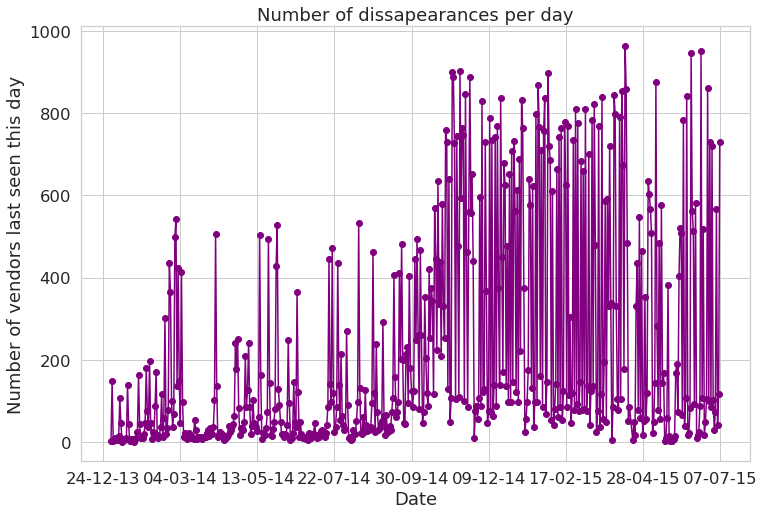

In [202]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(lastSeenDate['lastSeen'],
        lastSeenDate[('name','count')],
        '-o',
        color='purple')
ax.set(xlabel="Date", ylabel="Number of vendors last seen this day",
       title="Number of dissapearances per day")

# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))

# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
plt.show()

In [208]:
lastSeen2 = vendorsDF[['lastSeen', 'name']].groupby(by='name')

In [209]:
lastSeen2.agg([ 'max'])

,lastSeen
,max
name,
-BIGG-BALLs-,2014-10-08
-Euphoria-,2015-07-07
-FliP-,2015-03-19
-Inanna-,2014-02-04
-TarNation-,2015-01-16
...,...
zunidog,2015-07-07
~BigBoy,2015-07-05


In [219]:
lastSeenEver = lastSeen2.agg([ 'max']).reset_index().groupby(('lastSeen', 'max')).describe()

In [222]:
lastSeenEver=lastSeenEver.reset_index()

In [225]:
lastSeenEver.columns

MultiIndex([('lastSeen', 'max',       ''),
            (    'name',    '',  'count'),
            (    'name',    '', 'unique'),
            (    'name',    '',    'top'),
            (    'name',    '',   'freq')],
           )

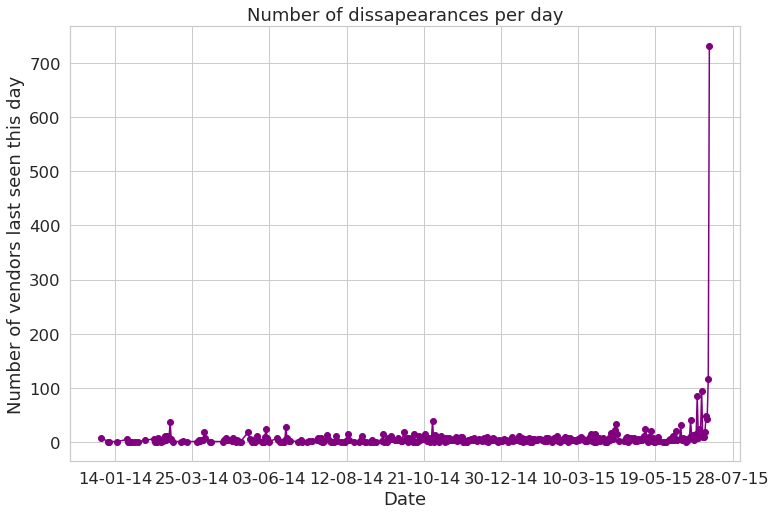

In [232]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(lastSeenEver[('lastSeen', 'max')],
        lastSeenEver[('name',    '',  'count')],
        '-o',
        color='purple', scaley='log')
ax.set(xlabel="Date", ylabel="Number of vendors last seen this day",
       title="Number of dissapearances per day")

# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))

# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
plt.show()

In [73]:
def addZeroPadding(s):
    s ='a '+str(s)
    i =1
    while(i<10):
        looked =str(i)
        s= s.replace('a '+looked+' days','0'+looked+' days')
        s= s.replace('a '+looked+' hours','0'+looked+' hours')
        s= s.replace('a '+looked+' months','0'+looked+' months')
        s= s.replace(' '+looked+' days',' 0'+looked+' days')
        s= s.replace(' '+looked+' hours',' 0'+looked+' hours')
        s= s.replace(' '+looked+' months',' 0'+looked+' months')
        i+=1
    s = s.replace("a ",'')
    return s

In [74]:
def cleanLastSeen(s):

    if ( 'days 0 hours' in s):
        t = dt.datetime.strptime(s,"%d days 0 hours")
        return dt.timedelta(days=t.day)
    elif ( 'months 0 days' in s):
        t = dt.datetime.strptime(s,"%m months 0 days")
        return dt.timedelta(days=30*t.month,hours=0)
    elif ( 'days' in s and 'hours' in s):
        t = dt.datetime.strptime(s,"$d days %H hours")
        return dt.timedelta(days=t.day,hours=t.hour)
    elif ( 'months' in s and 'days' in s):
        t = dt.datetime.strptime(s,"%m months %d days")
        return dt.timedelta(days=t.day+30*t.month,hours=0)
    elif ( 'hours' in s):
        t = dt.datetime.strptime(s,"%H hours")
        return dt.timedelta(hours=t.hour)
    else:
        return s;